In [1]:
# import os
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
import time
import pylab as pl
import pandas as pd
from numpy import loadtxt, zeros, ones, array, linspace, logspace
from pylab import scatter, show, title, xlabel, ylabel, plot, contour
plt.style.use('ggplot')

# Data Loading

In [2]:
data_R1 = pd.read_csv('Data_logged/Mooshimeter R1(40.2890).csv',dtype=str)
data_R2 = pd.read_csv('Data_logged/MooshiMeter R2(40.3028)_new.csv',dtype=str)
#data_R3 = pd.read_csv('Data_logged/MooshiMeter R3(40.2848).csv', dtype=str)
data_R3 = pd.read_csv('Data_logged/20/V3 Mooshimete_combined.csv', dtype=str)
print(data_R1.shape)
print(data_R2.shape)
print(data_R3.shape)

(7047, 2)
(8466, 2)
(26622, 2)


# Data Mooshimeter R1

Data Mooshimeter R1



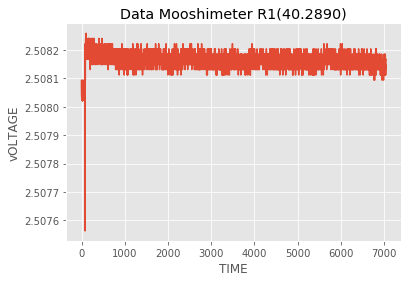

In [3]:
time_R1 = np.array(data_R1['TIME'])
voltage_R1 = np.array(data_R1['VOLTAGE'])

time_R1 = np.array(data_R1['TIME'])
voltage_R1 = np.array(data_R1['VOLTAGE'])
print('Data Mooshimeter R1\n')
x1, = plt.plot(voltage_R1, label="Θ1")
plt.title('Data Mooshimeter R1(40.2890)')
plt.xlabel('TIME')
plt.ylabel('vOLTAGE')

# Data Mooshimeter R2

Data Mooshimeter R2
 (8466, 2)


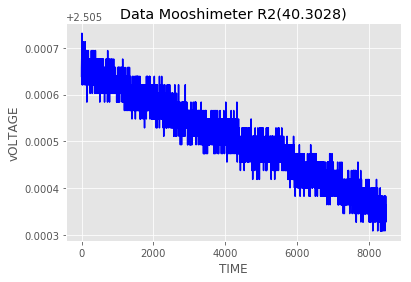

In [4]:
time_R2 = np.array(data_R2['TIME'])
voltage_R2 = np.array(data_R2['VOLTAGE'])
time_R2.shape

time_R2 = np.array(data_R2['TIME'])
voltage_R2 = np.array(data_R2['VOLTAGE'])
print('Data Mooshimeter R2\n', data_R2.shape)
#
x2, = plt.plot(voltage_R2, '-b', label="Θ2")
plt.title('Data Mooshimeter R2(40.3028)')
plt.xlabel('TIME')
plt.ylabel('vOLTAGE')

# Data Mooshimeter R3

Data Mooshimeter R3
 (26622, 2)


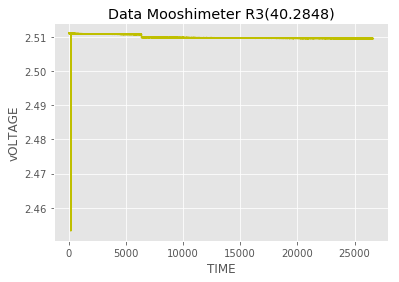

In [5]:
time_R3 = np.array(data_R3['TIME'])
voltage_R3 = np.array(data_R3['VOLTAGE'])
time_R3.shape

time_R3 = np.array(data_R3['TIME'])
voltage_R3 = np.array(data_R3['VOLTAGE'])
print('Data Mooshimeter R3\n', data_R3.shape)
#
x3, = plt.plot(voltage_R3, '-y', label="Θ3")
plt.title('Data Mooshimeter R3(40.2848)')
plt.xlabel('TIME')
plt.ylabel('vOLTAGE')

# Load MultiMeter Data

In [6]:
#data_MR1 = pd.read_csv('Data_logged/MultiMeter-V1-across-R1(40.31).csv',dtype=str)
#data_MR2 = pd.read_csv('Data_logged/MultiMeter-V2-across-R2(40.33).csv',dtype=str)
#data_MR3 = pd.read_csv('Data_logged/MultiMeter-V3-across-R340.31.csv', dtype=str)
#data_MR1 = pd.read_csv('Data_logged/20/V1 Multimeter.csv',dtype=str)
#data_MR2 = pd.read_csv('Data_logged/20/V2 Multimeter.csv',dtype=str)
#data_MR1 = pd.read_csv('Data_logged/V1-R1.csv',dtype=str)
#data_MR2 = pd.read_csv('Data_logged/V2-R2.csv',dtype=str)

data_MR1 = pd.read_csv('Data_logged/22/V1.csv',dtype=str)
data_MR2 = pd.read_csv('Data_logged/22/V2.csv',dtype=str)
data_MR3 = pd.read_csv('Data_logged/22/V3.csv', dtype=str)
print(data_MR1.shape)
print(data_MR2.shape)
print(data_MR3.shape)


(17809, 2)
(17803, 2)
(13291, 2)


# Data Multimeter R1

Data Multimeter R1(40.31KΩ)

891


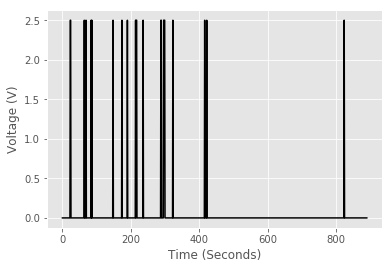

In [7]:
accurate = []
Naccurate = []
time_MR1 = np.array(data_MR1['TIME'])
voltage_MR1 = np.array(data_MR1['VOLTAGE'])

time_MR1 = np.array(data_MR1['TIME'])
voltage_MR1 = np.array(data_MR1['VOLTAGE'])
print('Data Multimeter R1(40.31KΩ)\n')
for i in range(0, 17809, 20):
    if float(voltage_MR1[i]) >= 2.5012 and  float(voltage_MR1[i]) <= 2.5022:
        Naccurate.append(0)  
    else:
        Naccurate.append(voltage_MR1[i])  
print(len(Naccurate))
        
f = plt.figure()        
xm1, = plt.plot(Naccurate, '-k', label="MΘ1")
#plt.title('Voltage V1 across R1(40.31KΩ) Using Multimeter; V = 7.52V, Temp = 24°C')
#plt.title('Voltage V1 across R1(40.31KΩ)')
plt.xlabel('Time (Seconds)')
plt.ylabel('Voltage (V)')
plt.rcParams['axes.facecolor'] = 'white'
f.savefig("anomaly.pdf", bbox_inches='tight')

In [8]:
print(voltage_MR1[1])

2.502


# Injection of Random Noises in voltage data

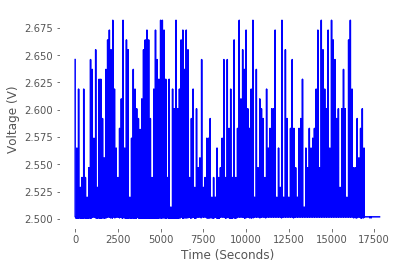

In [9]:
import random
#Anomalous_Voltage_MR1 = np.array()
#Anomalous_Voltage_MR1 = np.tile(0.0, 1701)
for i in range(0, 17000, 100):
    voltage_MR1[i] = float(voltage_MR1[i])+ random.randint(1,20)*.009
    
xm1, = plt.plot(voltage_MR1, '-b', label="MΘ1")
#plt.title('Voltage V1 across R1(40.31KΩ) Using Multimeter; V = 7.52V, Temp = 24°C')
#plt.title('Voltage V1 across R1(40.31KΩ)')
plt.xlabel('Time (Seconds)')
plt.ylabel('Voltage (V)')

# Calculation of detection time overhead

In [10]:
print(voltage_MR1[201])

2.502


In [38]:
import datetime
elapsed_ms1 = []
temp_time = []
list_max_time = []
for i in range(0, 17000):
    start = datetime.datetime.now()
    if float(voltage_MR1[i]) <= 2.482587 or float(voltage_MR1[i]) >= 2.50753:
        for j in range(0, random.randint(1,2000)):
            a = (2.482587 + 2.50753)/2
        #print('*****Anomaly*****')
        #print(voltage_MR1[i])
        end = datetime.datetime.now()
        diff = end - start
        elapsed_ms = (diff.days * 86400000) + (diff.seconds * 1000) + (diff.microseconds / 1000)
        elapsed_ms1.append(elapsed_ms*random.randint(1,100)*.001)
        #print(elapsed_ms*10000)
        #print(i)
        #print(diff.total_seconds() * 1000000)
    else:
        for j in range(0, random.randint(1,2000)):
            a = (2.482587 + 2.50753)/2
        #print('*****Anomaly*****')
        #print(voltage_MR1[i])
        end = datetime.datetime.now()
        diff = end - start
        elapsed_ms = (diff.days * 86400000) + (diff.seconds * 1000) + (diff.microseconds / 1000)
        elapsed_ms1.append(elapsed_ms*random.randint(1,100)*.001)
        #print(elapsed_ms*10000)
        #print(i)
        
    temp_time.append(elapsed_ms1[i])
    
    if i % 100 != 0:
        abc = 1
    else: 
        list_max_time.append(np.amax(temp_time))
        temp_time = []
        
        
#list_max_time.shape()
               

0.0
17000


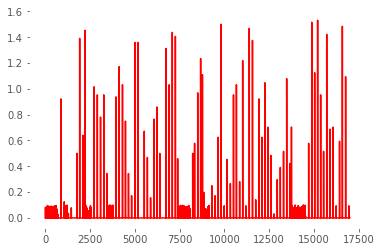

In [39]:
print(elapsed_ms1[0])
elapsed_ms1 = np.array(elapsed_ms1)
print(len(elapsed_ms1))
plt.grid(False)
#plt.style.use('ggplot')
xm1, = plt.plot(elapsed_ms1, '-r')
plt.rcParams['axes.facecolor'] = 'white'

In [40]:
from __future__ import division

#elapsed_ms1 =  [1,12,2,53,23,6,17] 
max_value = max(elapsed_ms1)
min_value = min(elapsed_ms1)
avg_value = sum(elapsed_ms1)/len(elapsed_ms1)
print(max_value)
print(min_value)
print(avg_value)

1.531348
0.0
0.00443590005882


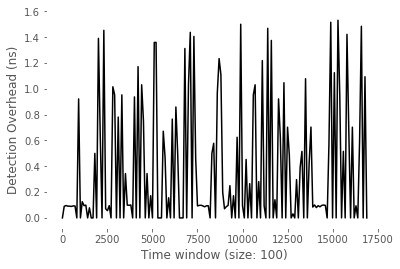

In [41]:
y = list_max_time
x = range(0, 17000,100)

#x = np.floor(np.linspace(0, epochs, epochs))
f = plt.figure()
plt.plot(x, list_max_time, color='k')
#plt.title('Training loss for CM1 for two-layer perceptron', fontsize=18)
plt.xlabel('Time window (size: 100)')
plt.ylabel('Detection Overhead (ns)')
#f.savefig("overhead.pdf", bbox_inches='tight')
plt.rcParams['axes.facecolor'] = 'white'
f.savefig("overhead.pdf", bbox_inches='tight')

In [42]:
from __future__ import division

#elapsed_ms1 =  [1,12,2,53,23,6,17] 
max_value = max(list_max_time)
min_value = min(list_max_time)
avg_value = sum(list_max_time)/len(list_max_time)
print(max_value)
print(min_value)
print(avg_value)

1.531348
0.0
0.366973976471


C:\Users\100641313\AppData\Local\Continuum\Anaconda3\lib\site-packages\plotly\offline\offline.py:459: UserWarning:

Your filename `mpl-basic-bar` didn't end with .html. Adding .html to the end of your file.



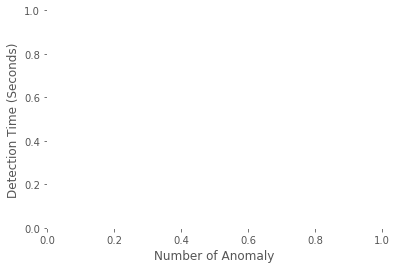

In [15]:
import matplotlib.pyplot as plt
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.offline as py
y = elapsed_ms1
N = len(y)
x = range(N)

width = 1/1.5
plt.bar(x, y,  color="blue")


fig = plt.gcf()
plot_url = py.plot_mpl(fig, filename='mpl-basic-bar')
#plt.title('Voltage V1 across R1(40.31KΩ) Using Multimeter; V = 7.52V, Temp = 24°C')
#plt.title('Voltage V1 across R1(40.31KΩ)')
plt.xlabel('Number of Anomaly')
plt.ylabel('Detection Time (Seconds)')

# Data Multimeter R2

In [ ]:
time_MR2 = np.array(data_MR2['TIME'])
voltage_MR2 = np.array(data_MR2['VOLTAGE'])

time_MR2 = np.array(data_MR2['TIME'])
voltage_MR2 = np.array(data_MR2['VOLTAGE'])
print('Data Multimeter MR2\n')
xm2, = plt.plot(voltage_MR2, '-k', label="MΘ2")
#plt.title('Voltage V2 across R2(40.33KΩ); Using Multimeter; V = 7.52V, Temp = 24°C')
#plt.title('Voltage V2 across R2(40.33KΩ)')
plt.xlabel('Time (Seconds)')
plt.ylabel('Voltage (V)')
plt.rcParams['axes.facecolor'] = 'white'

# Data Multimeter R3

In [ ]:
time_MR3 = np.array(data_MR3['TIME'])
voltage_MR3 = np.array(data_MR3['VOLTAGE'])
print('Data Mooshimeterr MR3\n')
xm3, = plt.plot(voltage_MR3, label="MΘ3")
#plt.title('Voltage V3 across R3(40.31KΩ)')
plt.xlabel('TIME (Seconds)')
plt.ylabel('VOLTAGE (V)')